In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

In [13]:
1-sp.stats.norm.cdf(9.57,loc=9.5,scale = 0.4)

0.430539816792326

In [15]:
sp.stats.norm.cdf(9.43,loc=9.5,scale = 0.4)*2

0.861079633584652

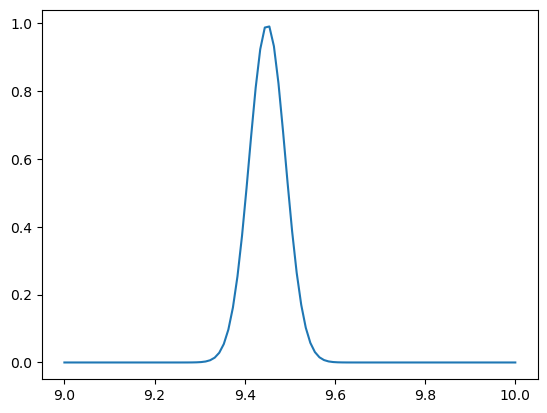

In [11]:
plt.plot(np.linspace(9,10,100),sp.stats.norm.pdf(np.linspace(5,15,100),loc=9.5,scale = 0.4))

In [6]:
np.linspace(20,100)

array([ 20.        ,  21.63265306,  23.26530612,  24.89795918,
        26.53061224,  28.16326531,  29.79591837,  31.42857143,
        33.06122449,  34.69387755,  36.32653061,  37.95918367,
        39.59183673,  41.2244898 ,  42.85714286,  44.48979592,
        46.12244898,  47.75510204,  49.3877551 ,  51.02040816,
        52.65306122,  54.28571429,  55.91836735,  57.55102041,
        59.18367347,  60.81632653,  62.44897959,  64.08163265,
        65.71428571,  67.34693878,  68.97959184,  70.6122449 ,
        72.24489796,  73.87755102,  75.51020408,  77.14285714,
        78.7755102 ,  80.40816327,  82.04081633,  83.67346939,
        85.30612245,  86.93877551,  88.57142857,  90.20408163,
        91.83673469,  93.46938776,  95.10204082,  96.73469388,
        98.36734694, 100.        ])

In [16]:
z = (9.57-9.5)/(0.4/np.sqrt(160)) 
z

2.213594362117875

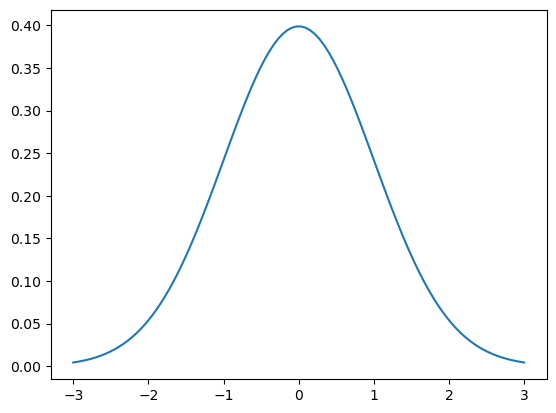

In [18]:
plt.plot(np.linspace(-3,3,100),sp.stats.norm.pdf(np.linspace(-3,3,100),loc=0,scale = 1))

In [21]:
(1-sp.stats.norm.cdf(2.2136))*2

0.02685630732867983

In [32]:
data

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [98]:
import sklearn
from sklearn.linear_model import LinearRegression
data = pd.read_csv('diemonds.txt',sep='\t')
train,test = sklearn.model_selection.train_test_split(data.to_numpy(),test_size=0.25,random_state = 1)

In [60]:
x_train = np.hstack((train[:,:3],train[:,4:]))
y_train = train[:,3]
x_test = np.hstack((test[:,:3],test[:,4:]))
y_test = test[:,3]

In [66]:
reg = LinearRegression().fit(x_train,y_train)

In [71]:
reg_1_error = np.abs(reg.predict(x_test)-y_test)

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
reg_2 = RandomForestRegressor(random_state=1).fit(x_train,y_train)

In [73]:
reg_2_error = np.abs(reg_2.predict(x_test)-y_test)

In [75]:
reg_2_error.mean()

779.7117583558185

In [76]:
reg_1_error.mean()

890.3764004285648

In [77]:
reg_2_error.std()

1113.533523021533

In [80]:
y_test.shape[0]

13485

In [81]:
t_stat = (reg_1_error.mean() - reg_2_error.mean())/np.sqrt(reg_1_error.std()**2/np.sqrt(y_test.shape[0])+reg_2_error.std()**2/np.sqrt(y_test.shape[0]))

In [82]:
t_stat

0.7413013295605543

In [85]:
s1 = reg_1_error.std()
s2 = reg_2_error.std()
n = y_test.shape[0]

In [86]:
mu = (s1**2/n+s2**2/n)**2/((s1**4)/(n**2*(n-1))+((s2**4)/(n**2*(n-1))))

In [88]:
1 - sp.stats.norm.cdf(t_stat,loc = 0, scale = 1)

0.2292553778693931

In [89]:
d = reg_1_error - reg_2_error

In [93]:
s = np.sqrt((1/(d.shape[0]-1))*(((d-d.mean())**2).sum()))

In [94]:
s

712.4654353031691

In [95]:
t = (reg_1_error.mean()-reg_2_error.mean())/(s/np.sqrt(d.shape[0]))

In [96]:
t

18.037259744511978

In [97]:
1 - sp.stats.norm.cdf(t,loc = 0, scale = 1)

0.0